In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 12})  # Change 14 to your desired font size
from matplotlib.ticker import ScalarFormatter
from dataclasses import dataclass, field
from typing import List
import re
import statistics

from pathlib import Path

In [2]:

def merge_paths(*paths):
    return Path(paths[0]).joinpath(*paths[1:])

In [3]:
def read_benchmark_file(content):
    match = re.search(r'\[(.*?)\]', content)
    if not match:
        raise ValueError("No array found in file.")
    data_str = match.group(1)
    times = [float(x.strip()) for x in data_str.split(',')]
    return times


In [4]:
path = "BEASTGPU/data"
with open(merge_paths(path, "graph_data.jl"), "r") as f:
    content = f.read()
density_values = re.search(r'density_values\s*=\s*\[([^\]]+)\]', content)
intgral_amount = re.search(r'intgral_amount\s*=\s*\[([^\]]+)\]', content)

if density_values and intgral_amount:
    density_list = np.array(list(map(int, density_values.group(1).split(','))))
    intgral_list = np.array(list(map(int, intgral_amount.group(1).split(','))))
else:
    print("One or both arrays not found.")

print(density_list)
print(intgral_list)
print("")



CPU_median = []
CPU_min = []
CPU_max = []
CPU_std = []

for density_value in density_list:
    with open(merge_paths(path, "GPU",str(density_value),"sortCPUSortCPU_Copy" + ".txt"), "r") as f:
        content = f.read()
    times = np.array(read_benchmark_file(content))

    CPU_median.append(np.median(times))
    CPU_min.append(np.min(times))
    CPU_max.append(np.max(times))
    CPU_std.append(np.std(times))


CPU_median = np.array(CPU_median).flatten()
CPU_min = np.array(CPU_min).flatten()
CPU_max = np.array(CPU_max).flatten()
CPU_std = np.array(CPU_std).flatten()

print("")
print(CPU_median)
print(CPU_min)
print(CPU_max)
print(CPU_std)


GPU_median = []
GPU_min = []
GPU_max = []
GPU_std = []

for density_value in density_list:
    with open(merge_paths(path, "GPU",str(density_value),"sortCPUSortCPU_process" + ".txt"), "r") as f:
        content = f.read()
    times = np.array(read_benchmark_file(content))

    GPU_median.append(np.median(times))
    GPU_min.append(np.min(times))
    GPU_max.append(np.max(times))
    GPU_std.append(np.std(times))


GPU_median = np.array(GPU_median)
GPU_min = np.array(GPU_min)
GPU_max = np.array(GPU_max)
GPU_std = np.array(GPU_std)

print("")
print(GPU_median)
print(GPU_min)
print(GPU_max)
print(GPU_std)










[24 30 33 36 38 40]
[ 764411904 1866240000 2732361984 3869835264 4804153344 5898240000]


[1.39972338 2.09140319 2.25061226 2.32511408 2.6583744  2.60850381]
[1.16257688 1.29758597 1.40340117 1.50146383 1.5740024  1.58835317]
[4.07853179 3.74468127 3.64966795 3.44253787 3.88825027 5.60166335]
[0.57442948 0.5288025  0.18372807 0.85134194 0.79705936 1.08210195]

[0.11372986 0.24307634 0.33668986 0.56182697 0.6629367  0.82552439]
[0.10030937 0.22845438 0.32475788 0.52327856 0.63731299 0.7963439 ]
[1.50355342 1.08050197 1.36291106 1.63544764 2.03383482 4.19032142]
[0.1859967  0.10938011 0.1374795  0.16207543 0.18768632 0.35121671]


C:\Users\Ian\AppData\Local\Temp\ipykernel_7192\1474796107.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


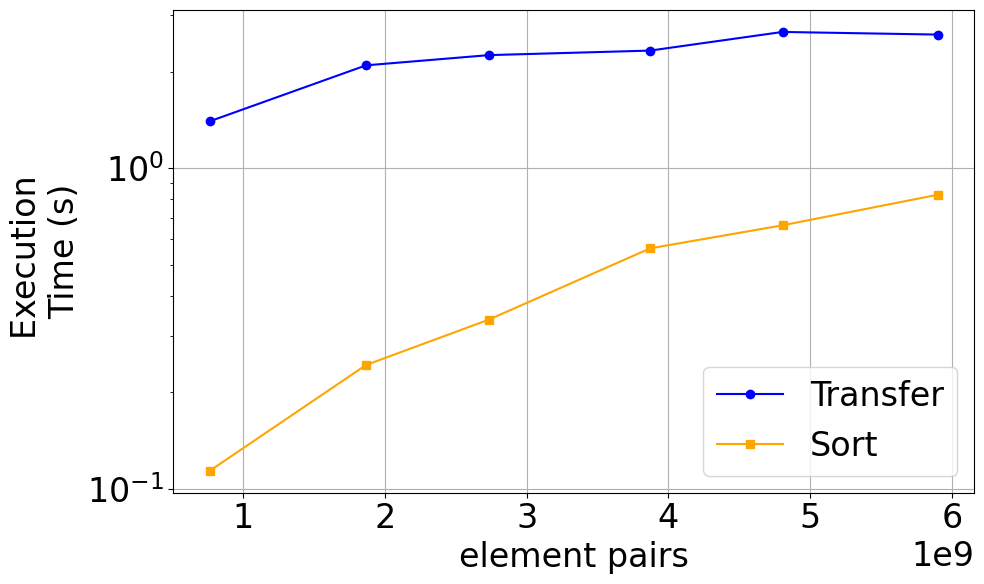

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(intgral_list, CPU_median , marker='o', label='Transfer', color='blue')
ax.plot(intgral_list, GPU_median , marker='o', label='Sort', color='orange')

ax.set_xlabel('element pairs', fontsize=24)
ax.set_ylabel('Execution \nTime (s)', fontsize=24)
#ax.set_title('Execution Time vs threads', fontsize=24)

ax.tick_params(axis='both', labelsize=24)
ax.set_yscale('log')


fig.canvas.draw()
offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(24)  # Set font size of '1e9'

ax.legend(fontsize=24)

plt.ylim(bottom=0)
ax.grid(True)
plt.tight_layout()
plt.savefig("graphs/sortingCPU_Breakdown.svg", format='svg')
plt.show()

C:\Users\Ian\AppData\Local\Temp\ipykernel_7192\3689493900.py:28: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


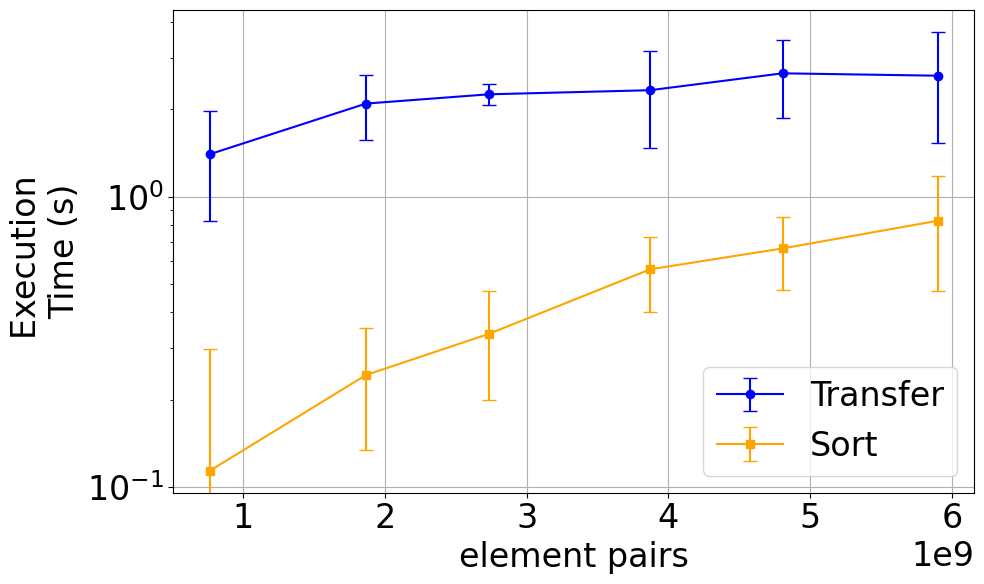

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot CPU with error bars
ax.errorbar(
    intgral_list, CPU_median, yerr=CPU_std,
    marker='o', label='Transfer', color='blue', capsize=5, linestyle='-'
)

# Plot GPU with error bars
ax.errorbar(
    intgral_list, GPU_median, yerr=GPU_std,
    marker='o', label='Sort', color='orange', capsize=5, linestyle='-'
)

ax.set_xlabel('element pairs', fontsize=24)
ax.set_ylabel('Execution \nTime (s)', fontsize=24)
# ax.set_title('Execution Time vs threads', fontsize=24)

ax.tick_params(axis='both', labelsize=24)
ax.set_yscale('log')

fig.canvas.draw()
offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(24)

ax.legend(fontsize=24)

plt.ylim(bottom=0)
ax.grid(True)
plt.tight_layout()
plt.savefig("graphs/sortingCPU_Breakdown.svg", format='svg')
plt.show()